In [14]:
import json
from collections import Counter, defaultdict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define your provided code functions

def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def find_shared_tiles_and_agreement(labeler_data, threshold):
    common_tiles = set.intersection(*[set(labeler.keys()) for labeler in labeler_data.values()])
    total_common_tiles = len(common_tiles)
    agreed_tiles = 0
    common_tile_labels = {}

    for tile in common_tiles:
        tile_labels = []
        for labeler, data in labeler_data.items():
            first_image = next(iter(data[tile]))
            label = data[tile][first_image]['label']
            tile_labels.append(label)
        common_tile_labels[tile] = tile_labels
        label_count = Counter(tile_labels)
        most_common_label, most_common_count = label_count.most_common(1)[0]
        if most_common_count >= threshold:
            agreed_tiles += 1
    
    agreement_percentage = (agreed_tiles / total_common_tiles) * 100 if total_common_tiles > 0 else 0
    print(f"\nTotal common tiles: {total_common_tiles}")
    print(f"Number of tiles where at least {threshold} labelers agree: {agreed_tiles}")
    print(f"Percentage of agreement: {agreement_percentage:.2f}%")
    
    return common_tile_labels

def process_labeler_files(file_paths, threshold):
    labeler_data = {}
    for file_path in file_paths:
        labeler_name = file_path.split('_')[0]
        labeler_data[labeler_name] = load_json(file_path)
    common_tile_labels = find_shared_tiles_and_agreement(labeler_data, threshold)
    return labeler_data, common_tile_labels



Total common tiles: 99
Number of tiles where at least 5 labelers agree: 60
Percentage of agreement: 60.61%


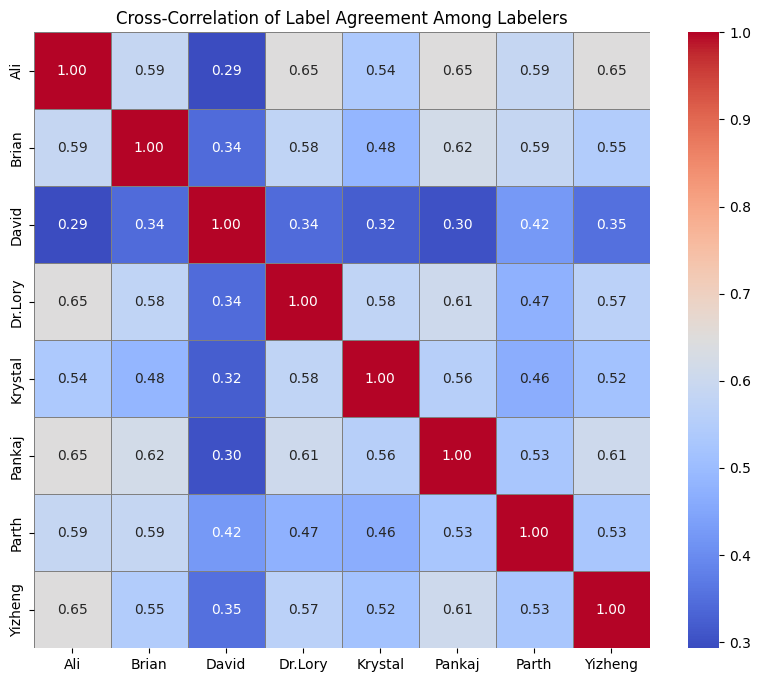

In [15]:
# List your JSON file paths here
file_paths = ['Ali_labels.json', 
              'Brian_labels.json',
             'David_labels.json', 
             'Dr.Lory_labels.json',
             'Krystal_labels.json',
             'Pankaj_labels.json',
             'Parth_labels.json',
             'Yizheng_labels.json']
threshold = 5  # Set an example threshold

# Process files to get labeler data and shared tile labels
labeler_data, common_tile_labels = process_labeler_files(file_paths, threshold)

# Prepare data for cross-correlation analysis
labeler_names = list(labeler_data.keys())
num_labelers = len(labeler_names)
correlation_matrix = np.zeros((num_labelers, num_labelers))

# Calculate cross-correlation between labelers
for i, labeler1 in enumerate(labeler_names):
    for j, labeler2 in enumerate(labeler_names):
        if i == j:
            correlation_matrix[i, j] = 1.0  # Perfect correlation with oneself
        else:
            agreement_count = sum(1 for tile in common_tile_labels 
                                  if common_tile_labels[tile][i] == common_tile_labels[tile][j])
            correlation_matrix[i, j] = agreement_count / len(common_tile_labels)

# Create a DataFrame for easier handling in visualization
correlation_df = pd.DataFrame(correlation_matrix, index=labeler_names, columns=labeler_names)

# Plot the cross-correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", cbar=True, square=True, 
            linewidths=0.5, linecolor='gray', fmt=".2f")
plt.title("Cross-Correlation of Label Agreement Among Labelers")
# plt.savefig('CC_raw.png')
plt.show()



Total common tiles: 99
Number of tiles where at least 6 labelers agree: 77
Percentage of agreement: 77.78%


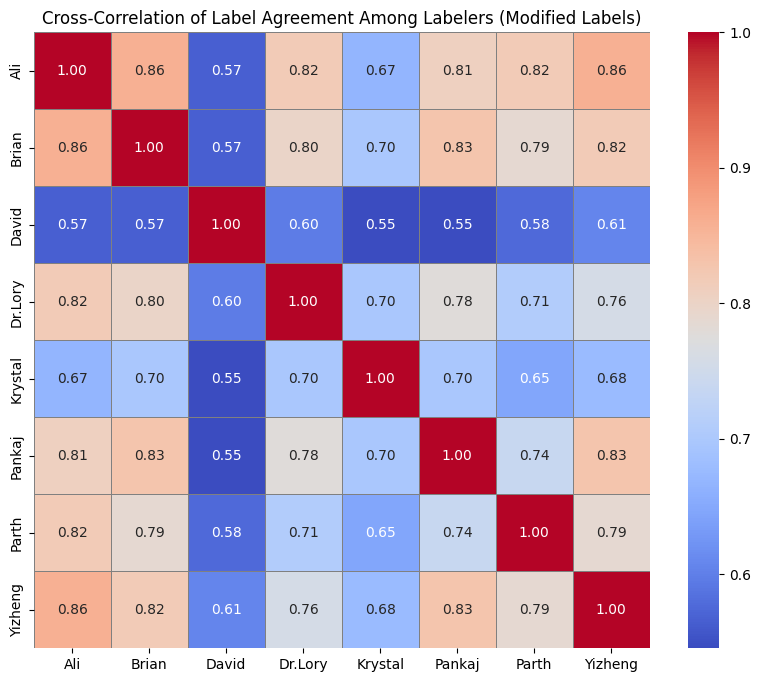

In [16]:
import json
from collections import Counter, defaultdict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define your provided code functions with an added transformation step

def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def transform_labels(label):
    # Transform specific labels as requested
    if label == '3':
        return '4'
    elif label == '1':
        return '0'
    else:
        return label

def find_shared_tiles_and_agreement(labeler_data, threshold):
    # Find common tiles and apply transformation
    common_tiles = set.intersection(*[set(labeler.keys()) for labeler in labeler_data.values()])
    total_common_tiles = len(common_tiles)
    agreed_tiles = 0
    common_tile_labels = {}

    for tile in common_tiles:
        tile_labels = []
        for labeler, data in labeler_data.items():
            first_image = next(iter(data[tile]))
            # Apply label transformation here
            label = transform_labels(data[tile][first_image]['label'])
            tile_labels.append(label)
        common_tile_labels[tile] = tile_labels
        label_count = Counter(tile_labels)
        most_common_label, most_common_count = label_count.most_common(1)[0]
        if most_common_count >= threshold:
            agreed_tiles += 1
    
    agreement_percentage = (agreed_tiles / total_common_tiles) * 100 if total_common_tiles > 0 else 0
    print(f"\nTotal common tiles: {total_common_tiles}")
    print(f"Number of tiles where at least {threshold} labelers agree: {agreed_tiles}")
    print(f"Percentage of agreement: {agreement_percentage:.2f}%")
    
    return common_tile_labels

def process_labeler_files(file_paths, threshold):
    labeler_data = {}
    for file_path in file_paths:
        labeler_name = file_path.split('_')[0]
        labeler_data[labeler_name] = load_json(file_path)
    # Apply label transformation to common tiles
    common_tile_labels = find_shared_tiles_and_agreement(labeler_data, threshold)
    return labeler_data, common_tile_labels

# List your JSON file paths here
file_paths = ['Ali_labels.json', 
              'Brian_labels.json',
             'David_labels.json', 
             'Dr.Lory_labels.json',
             'Krystal_labels.json',
             'Pankaj_labels.json',
             'Parth_labels.json',
             'Yizheng_labels.json']
threshold = 6  # Set an example threshold

# Process files to get labeler data and transformed shared tile labels
labeler_data, common_tile_labels = process_labeler_files(file_paths, threshold)

# Prepare data for cross-correlation analysis
labeler_names = list(labeler_data.keys())
num_labelers = len(labeler_names)
correlation_matrix = np.zeros((num_labelers, num_labelers))

# Calculate cross-correlation between labelers using transformed labels
for i, labeler1 in enumerate(labeler_names):
    for j, labeler2 in enumerate(labeler_names):
        if i == j:
            correlation_matrix[i, j] = 1  # Perfect correlation with oneself
        else:
            # Count the transformed label matches for cross-correlation
            agreement_count = sum(1 for tile in common_tile_labels 
                                  if transform_labels(common_tile_labels[tile][i]) == transform_labels(common_tile_labels[tile][j]))
            correlation_matrix[i, j] = agreement_count / len(common_tile_labels) if len(common_tile_labels) > 0 else 0

# Create a DataFrame for easier handling in visualization
correlation_df = pd.DataFrame(correlation_matrix, index=labeler_names, columns=labeler_names)

# Plot the cross-correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", cbar=True, square=True, 
            linewidths=0.5, linecolor='gray', fmt=".2f")
plt.title("Cross-Correlation of Label Agreement Among Labelers (Modified Labels)")
# plt.savefig('CC_tol.png')
plt.show()



In [18]:
import json
from collections import Counter, defaultdict
import pandas as pd

# Define the helper functions
def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def transform_labels(label):
    if label == '3':
        return '4'
    elif label == '1':
        return '0'
    else:
        return label

def calculate_agreement(labeler_data, threshold, use_transformed_labels=False):
    # Find common tiles across all labelers
    common_tiles = set.intersection(*[set(labeler.keys()) for labeler in labeler_data.values()])
    agreed_tiles = 0

    for tile in common_tiles:
        tile_labels = []
        for labeler, data in labeler_data.items():
            first_image = next(iter(data[tile]))
            # Optionally transform labels if specified
            label = data[tile][first_image]['label']
            if use_transformed_labels:
                label = transform_labels(label)
            tile_labels.append(label)
        
        # Count the frequency of each label
        label_count = Counter(tile_labels)
        most_common_label, most_common_count = label_count.most_common(1)[0]

        # Check if the most common label meets the threshold for agreement
        if most_common_count >= threshold:
            agreed_tiles += 1

    return agreed_tiles

def process_labeler_files(file_paths):
    labeler_data = {}
    for file_path in file_paths:
        labeler_name = file_path.split('_')[0]
        labeler_data[labeler_name] = load_json(file_path)
    return labeler_data

# List your JSON file paths here
file_paths = ['Ali_labels.json', 
              'Brian_labels.json',
             'David_labels.json', 
             'Dr.Lory_labels.json',
             'Krystal_labels.json',
             'Pankaj_labels.json',
             'Parth_labels.json',
             'Yizheng_labels.json']

# Process files to get labeler data
labeler_data = process_labeler_files(file_paths)

# Initialize a list to store agreement results
agreement_results = []

# Calculate agreement for thresholds from 2 to 8
for threshold in range(2, 9):
    # Agreement without transformation
    original_agreement = calculate_agreement(labeler_data, threshold, use_transformed_labels=False)
    # Agreement with transformation
    transformed_agreement = calculate_agreement(labeler_data, threshold, use_transformed_labels=True)
    # Append results to the list
    agreement_results.append({
        "Threshold": threshold,
        "Agreement (Original Labels)": original_agreement,
        "Agreement (Transformed Labels)": transformed_agreement
    })

# Convert the list of results into a DataFrame
agreement_table = pd.DataFrame(agreement_results)
agreement_table.set_index("Threshold", inplace=True)

# Display the results table
display(agreement_table)


,Agreement (Original Labels),Agreement (Transformed Labels)
Threshold,,
2,99,99
3,98,99
4,81,98
5,60,85
6,43,77
7,29,58
8,15,34
